In [1]:
#! pip install spacy -U
#! spacy download en
#! pipinstall catboost -U
#! pip install lightgbm

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Лемматизация</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Dummy" data-toc-modified-id="Dummy-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dummy</a></span></li><li><span><a href="#Линейка" data-toc-modified-id="Линейка-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Линейка</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Экзамен" data-toc-modified-id="Экзамен-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Экзамен</a></span><ul class="toc-item"><li><span><a href="#Линейка" data-toc-modified-id="Линейка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейка</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

**Описание проекта**  
Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.  
Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.  
Постройте модель со значением метрики качества F1 не меньше 0.75.  
**Инструкция для проекта**  
Решить задачу можно как с помощью BERT, так и без этой нейронки. Если хотите попробовать BERT —
Выполните проект локально. В тренажере тетрадь Jupyter ограничена 4 ГБ оперативной памяти — для проекта с BERT этого может не хватить.  
Упомяните BERT в заголовке проекта в первой ячейке:  

Выполнить проект без BERT можно локально или в нашем тренажёре.  
В любом случае алгоритм решения выглядит так:  
Загрузите и подготовьте данные.  
Обучите разные модели.  
Сделайте выводы.  
**Описание данных**  
Столбец text в нём содержит текст комментария, а toxic — целевой признак.

## Обзор данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

import spacy
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool, cv
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    data = pd.read_csv('/datasets/toxic_comments.csv')
except:
    data = pd.read_csv('toxic_comments.csv')

In [4]:
data.head(10)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


### Лемматизация

In [5]:
'''%%time
def lemmatize_text(text):
    doc = nlp(text)
    word_list = nltk.word_tokenize(text)
    lemm_text = " ".join([token.lemma_ for token in doc])
    cleared_text = re.sub(r'[^a-zA-Z]', ' ', lemm_text) 
    return " ".join(cleared_text.split())

data['lemm_text'] = data['text'].apply(lemmatize_text)'''
'Wall time: 50min 48s'

'Wall time: 50min 48s'

In [6]:
df = pd.read_csv('new_data')

In [7]:
df

,Unnamed: 0,text,toxic,lemm_text
0,0,Explanation\nWhy the edits made under my usern...,0,Explanation why the edit make under my usernam...
1,1,D'aww! He matches this background colour I'm s...,0,D aww he match this background colour I be see...
2,2,"Hey man, I'm really not trying to edit war. It...",0,hey man I be really not try to edit war it be ...
3,3,"""\nMore\nI can't make any real suggestions on ...",0,more I can not make any real suggestion on imp...
4,4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...
...,...,...,...,...
159566,159566,""":::::And for the second time of asking, when ...",0,and for the second time of ask when your view ...
159567,159567,You should be ashamed of yourself \n\nThat is ...,0,you should be ashamed of yourself that be a ho...
159568,159568,"Spitzer \n\nUmm, theres no actual article for ...",0,Spitzer Umm there s no actual article for pros...
159569,159569,And it looks like it was actually you who put ...,0,and it look like it be actually you who put on...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159571 non-null  int64 
 1   text        159571 non-null  object
 2   toxic       159571 non-null  int64 
 3   lemm_text   159564 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.9+ MB


Проверим пропуски

In [9]:
df.isna().sum()

Unnamed: 0    0
text          0
toxic         0
lemm_text     7
dtype: int64

In [10]:
df[df['lemm_text'].isna()]

,Unnamed: 0,text,toxic,lemm_text
4482,4482,1993\n\n1994\n\n1995\n\n1996\n\n1997\n\n1998\n...,0,NaN
6300,6300,193.61.111.53 15:00,0,NaN
17311,17311,~ \n\n68.193.147.157,0,NaN
52442,52442,"14:53,",0,NaN
53787,53787,92.24.199.233|92.24.199.233]],0,NaN
61758,61758,"""\n\n 199.209.144.211 """,0,NaN
82681,82681,"""\n '''''' 2010/2013 """,0,NaN


Ну, это ерунда какая-то, так что сносим

In [11]:
df.dropna(inplace=True)

In [12]:
df.duplicated().sum()

0

Дубликатов нет

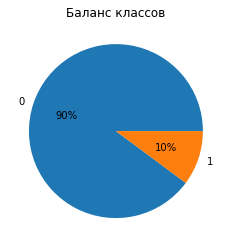

In [13]:
classes = df['toxic'].value_counts()
plt.title('Баланс классов')
plt.pie(classes, labels=classes.index, autopct='%.0f%%');

Видим дисбаланс классов, по-этому будем менять их вес, так как из-за большой выборки не стоит делать upsampling, но и удалять 80% данных- такая себе идея.

In [14]:
class_weights = {0:1, 1:9}

## Обучение модели

In [15]:
X = df['lemm_text']
y = df['toxic']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=42)

Переведем текст в вектор

In [17]:
tf = TfidfVectorizer(stop_words=stop_words)

In [18]:
X_train = tf.fit_transform(X_train)
X_test = tf.transform(X_test)

### Dummy

In [19]:
dummy = DummyClassifier(strategy="constant", constant=[1])
dummy.fit(X_train, y_train)
dum_pred = dummy.predict(X_test)
f1_score(y_test, dum_pred)

0.1845859785650898

### Линейка

In [20]:
lr = LogisticRegression(random_state=42, class_weight=class_weights)
cross_val_score(lr, X_train, y_train, scoring='f1', cv=3).mean()

0.754565568097847

Средная F1 на 3х фолдах: 0.754565568097847.
    Параметр class_weight = 'balanced' приводит к более низким результатам

### CatBoost

In [21]:
params = {
    'iterations': 500,
    'random_seed': 42,
    'verbose': 200,
    'eval_metric': 'F1',
    'loss_function':'Logloss',
    'auto_class_weights':'SqrtBalanced'
}

In [22]:
cat = CatBoostClassifier()
cv_data = cv(
    params=params,
    pool=Pool(X_train, label=y_train),
    fold_count=3,
    shuffle=True,
    plot=True,
    stratified=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]
0:	learn: 0.5334167	test: 0.5287418	best: 0.5287418 (0)	total: 959ms	remaining: 7m 58s
200:	learn: 0.7200746	test: 0.7088885	best: 0.7088885 (200)	total: 3m 3s	remaining: 4m 32s
400:	learn: 0.7682606	test: 0.7477339	best: 0.7478835 (396)	total: 6m 11s	remaining: 1m 31s
499:	learn: 0.7893736	test: 0.7655540	best: 0.7655540 (499)	total: 7m 40s	remaining: 0us

bestTest = 0.7655539637
bestIteration = 499

Training on fold [1/3]
0:	learn: 0.5291757	test: 0.5154300	best: 0.5154300 (0)	total: 781ms	remaining: 6m 29s
200:	learn: 0.7151358	test: 0.7128821	best: 0.7128821 (199)	total: 3m 5s	remaining: 4m 36s
400:	learn: 0.7588015	test: 0.7538274	best: 0.7538653 (399)	total: 6m 5s	remaining: 1m 30s
499:	learn: 0.7804351	test: 0.7752348	best: 0.7752348 (499)	total: 7m 36s	remaining: 0us

bestTest = 0.7752348205
bestIteration = 499

Training on fold [2/3]
0:	learn: 0.5474037	test: 0.5544917	best: 0.5544917 (0)	total: 773ms	remaining: 6m 25s
200:	learn: 0.7178381	test: 0.70907

In [24]:
cat = CatBoostClassifier(**params)
cross_val_score(cat, X_train, y_train, cv=2, scoring='f1').mean()

Learning rate set to 0.11162
0:	learn: 0.5420313	total: 665ms	remaining: 5m 31s
200:	learn: 0.8159092	total: 2m 9s	remaining: 3m 12s
400:	learn: 0.8620552	total: 4m 15s	remaining: 1m 3s
499:	learn: 0.8712980	total: 5m 15s	remaining: 0us
Learning rate set to 0.111621
0:	learn: 0.5161743	total: 648ms	remaining: 5m 23s
200:	learn: 0.8162204	total: 2m 4s	remaining: 3m 4s
400:	learn: 0.8538952	total: 4m 4s	remaining: 1m
499:	learn: 0.8643209	total: 5m 2s	remaining: 0us


0.769983391444052

Средняя F1 на 3х фолдах CatBoost - 0.776115452999699

### LGBM

In [25]:
lgbm = LGBMClassifier(class_weight='balanced')
cross_val_score(lgbm, X_train, y_train, cv=3, scoring='f1').mean()

0.7385463402331301

Средняя F1 на 3х фолдах LightGBM - 0.7385463402331301

### Вывод

Таким образом минимальный порог у нас проходят CatBoost и линейка со значениями f1: 0.776 и 0.754 соответственно

## Экзамен

### Линейка

In [26]:
lr = LogisticRegression(random_state=42, class_weight=class_weights)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
f1_score(y_test, lr_pred)

0.7591463414634146

f1 = 0.7591463414634146

### CatBoost

In [28]:
cat = CatBoostClassifier(**params)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)
f1_score(y_test, cat_pred)

Learning rate set to 0.150066
0:	learn: 0.5545902	total: 1.02s	remaining: 8m 30s
200:	learn: 0.8269743	total: 3m 18s	remaining: 4m 55s
400:	learn: 0.8582306	total: 6m 43s	remaining: 1m 39s
499:	learn: 0.8697594	total: 8m 24s	remaining: 0us


0.7859740259740261

f1 = 0.7859740259740261

## Вывод

- Мы подготовили данные, лематизировав текст и приведя его в векторный тип;
- Обнаружили дисбаланс классов;
- Обучили разные модели с учетом дисбаланса классов;
- Выбрали лучшие модели и провели им экзамен на тестовой выборке.

Лучше всех себя показал CatBoost со значением f1-меры = 0.785